In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

%matplotlib inline

### game configuration

In [3]:
## game definition and strategy evaluation
from util import *
from leduc import *

## basic configuration of the game
N_cards = 5

A_round1 = [0.5,1,2,4,8]
A_round2 = [1,2,4,8,16]

# A_round1 = [0.5,1]
# A_round2 = [1,2]

players = [ChancePlayer(N_cards),Player1(A_round1,A_round2),Player2(A_round1,A_round2)]

### train strategy and visualize convergence rate

In [ ]:
## cfr variants
from cfr import *
from cfr_p import *
from mccfr import *

In [4]:
def train_and_eval(train_func,N_iter=1000,eval_freq=50,if_display=True):
    regret_info,avg_policy_info,count_info = dict(),dict(),{'count':0}
    eval_iters = set(np.power(10,(np.log10(N_iter) / eval_freq * np.arange(eval_freq+1))).astype(int))
    eval_result = []
    
    total_train_time,total_eval_time = 0,0
    for iter_ in range(N_iter+1):
        tt = time.time()
        train_func(LeducHistory(),players,[1,2],regret_info,avg_policy_info,count_info,iter_=iter_)
        train_time = time.time() - tt
        total_train_time += train_time

        if iter_ == 0 or iter_ in eval_iters:
            tt = time.time()
            v0 = eval_policy(LeducHistory(),players,avg_policy_info)
            v1 = eval_BR(LeducHistory(),players,1,avg_policy_info)
            v2 = eval_BR(LeducHistory(),players,2,avg_policy_info)
            eval_time = time.time() - tt
            
            total_eval_time += eval_time
            eval_result.append((iter_+1,count_info['count'],v0,v1,v2))

            if if_display:
                print('iter: {}, train time: {:.2f}. '
                      'v1 = {:.3f}, v0 = {:.3f}, v2 = {:.3f}, eval time: {:.2f}.'.format(
                          iter_,train_time,v1,v0,v2,eval_time))
                
    print('total train time: {:.2f}, total eval time: {:.2f}.'.format(total_train_time,total_eval_time))

    return (regret_info,avg_policy_info),eval_result

def plot_exp_curve(eval_result):
    iters,counts,v0s,v1s,v2s = zip(*eval_result)
#     log_iters = np.log10(np.array(iters))
    log_iters = np.log10(np.array(counts))
    log_exp1 = np.log10(np.maximum(np.array(v1s) - np.array(v0s),1e-8))
    log_exp2 = np.log10(np.maximum(np.array(v0s) - np.array(v2s),1e-8))
    plt.figure()
    plt.scatter(log_iters,log_exp1,10,'r',marker='x')
    plt.scatter(log_iters,log_exp2,10,'b',marker='x')
    plt.plot(log_iters,log_exp1,'r--',label='exp player 1')
    plt.plot(log_iters,log_exp2,'b--',label='exp player 2')
#     plt.xlabel('log(N iter)')
    plt.xlabel('log(node counts)')
    plt.ylabel('log(exploitability)')
    plt.legend()
    plt.grid()
    plt.show()

In [5]:
## training hyper-parameters
eval_freq = 50
if_display = False
# if_display = True

total train time: 5092.69, total eval time: 141.31.


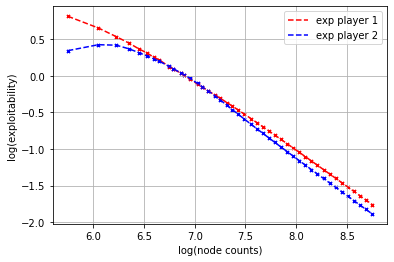

In [6]:
## CFR
solution,eval_result = train_and_eval(train_CFR,N_iter=int(1e3),eval_freq=eval_freq,if_display=if_display)
plot_exp_curve(eval_result)

total train time: 4758.98, total eval time: 141.05.


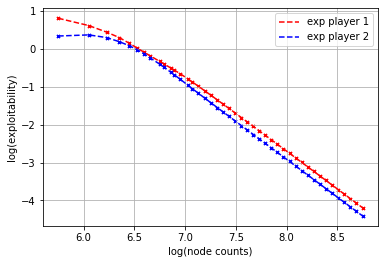

In [7]:
## CFR+
solution,eval_result = train_and_eval(train_CFR_plus,N_iter=int(1e3),eval_freq=eval_freq,if_display=if_display)
plot_exp_curve(eval_result)

total train time: 1810.18, total eval time: 126.02.


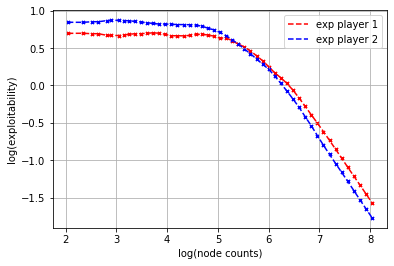

In [8]:
## MCCFR
solution,eval_result = train_and_eval(train_MCCFR,N_iter=int(1e6),eval_freq=eval_freq,if_display=if_display)
plot_exp_curve(eval_result)

total train time: 4309.96, total eval time: 136.62.


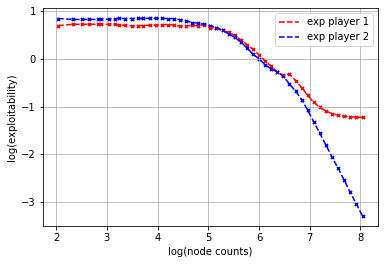

In [9]:
## linear MCCFR
solution,eval_result = train_and_eval(train_linear_MCCFR,N_iter=int(1e6),eval_freq=eval_freq,
                                      if_display=if_display)
plot_exp_curve(eval_result)